<a href="https://colab.research.google.com/github/albertofernandezvillan/computer-vision-and-deep-learning-course/blob/main/pytorch_2_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" style="padding-right:10px;" src ="https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/university_oviedo_logo.png" width=300 px>

This notebook is from the Course "***Computer vision in the new era of Artificial Intelligence and Deep Learning***", or "*Visión por computador en la nueva era de la Inteligencia Artificial y el Deep Learning*" (ES) from the "Second quarter university extension courses" that the University of Oviedo is offering (05/04/2021 - 16/04/2021)

<[Github Repository](https://github.com/albertofernandezvillan/computer-vision-and-deep-learning-course) | [Course Web Page Information](https://www.uniovi.es/estudios/extension/cursos2c/-/asset_publisher/SEp0PJi4ISGo/content/vision-por-computador-en-la-nueva-era-de-la-inteligencia-artificial-y-el-deep-learning?redirect=%2Festudios%2Fextension%2Fcursos2c)>

# Machine learning

Machine learning on a computer produces outputs to new inputs in the expected way. One of the most common forms used today is learning through examples, where a model is built that allows relating inputs and outputs. In this way, you can subsequently respond to new inputs using the information stored in the model. This form of learning is called supervised when the examples are labeled, that is, when each input has an expected output associated with it.

To understand this process, this tutorial proposes an estimation of a linear model.


# Data generation

First, some data will be generated using PyTorch.

In [ ]:
import matplotlib.pyplot as plt
import torch
torch.version.__version__

'1.8.1+cu101'

In [ ]:
torch.cuda.is_available()

True

Data is generated from a line and then noise is added to it.

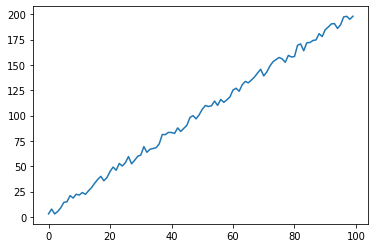

In [ ]:
torch.manual_seed(0)

x = torch.tensor(range(100))
W = 2
B = 3
y = W*x + B
y = y + 10*(torch.rand(x.shape[0]) - 0.5)
plt.plot(x,y)

# Definition of the model

A model is a mathematical function that relates inputs and outputs. In addition, each model will have certain parameters. In this case, the model of a straight line is $ y = wx + b $, therefore the parameters are $ w $ and $ b $.

In [ ]:
def model(x, w, b):
  return w * x + b

The model can be evaluated given some inputs and some parameters.

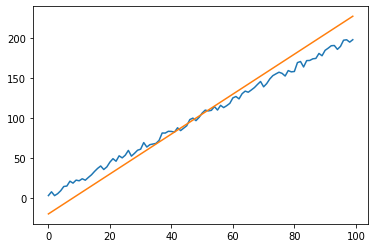

In [ ]:
plt.plot(x,y)

yp = model(x, 2.5, -20)
plt.plot(x,yp)

# Loss function

To determine the accuracy of a model, a loss function is defined to determine the difference between the prediction and the reality. The most common metric is the quadratic difference between the prediction and reality. $ MSE = \frac {\sum_i^ N {(yp-y) ^ 2}} {N} $

In [ ]:
def loss_fn(yp, y):
  squared_diffs = (yp - y)**2
  return squared_diffs.mean()

The loss function allows us to determine how well a model fits the data.

In [ ]:
yp = model(x, 2.5, -20)
loss_fn(yp, y)

tensor(215.5211)

The closer the model is to the optimum, the lower the loss.

In [ ]:
y3 = model(x, 2, 5)
loss_fn(y3, y)

tensor(13.0642)

# Gradient descent training

Training the model consists of estimating the optimal parameters of the model for certain data.

## Model initialization

The model can be initialized from a configuration close to the ideal if it is known. In most cases, the optimum is not known, which forces a random initialization with the consequent error.

In [ ]:
wp = torch.rand(1)
bp = torch.rand(1)
yp = model(x, wp, bp)
loss_fn(yp, y)

tensor(3712.4043)

The problem of trining is to determine, given a configuration, how to move in the right direction.

## Learning: estimating the optimal model parameters

Suppose you want to find the minimum of a function starting from a random point. In this case, which would be the advance direction?

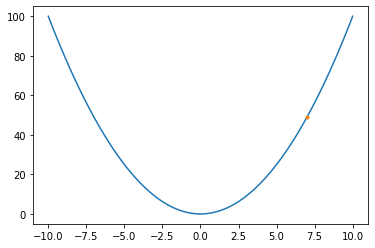

In [ ]:
xt = torch.linspace(-10,10,100)
yt = xt**2
plt.plot(xt,yt)

xi = 7
yi = xi**2
plt.plot(xi,yi,'.')

It seems clear that we must move in the direction of the gradient. Precisely, this is the algorithm used to find the optimal configuration of the model parameters: descending in the direction of the maximum gradient.

This same process can be extended to the multidimensional case. The intuitive idea is that of the fall of water on a surface.

<center><img src="https://upload.wikimedia.org/wikipedia/commons/6/68/Gradient_ascent_%28surface%29.png"></center>

Mathematically, the idea consists in calculating the rate of change of the loss function with respect to each parameter of the model. Subsequently, each parameter is modified in the direction indicated by the loss function. Analytically, the calculation of the gradient corresponds to the calculation of the derivative.

The calculation of the gradient of the loss function with respect to each parameter of the model would be:

$\frac{d(loss\_fn)}{d(w)}$

Applying the [chain rule](https://en.wikipedia.org/wiki/Chain_rule), this derivative can be calculated as

$\frac{d(loss\_fn)}{d(w)} = \frac{d(loss\_fn)}{d(y)} \frac{d(y)}{d(w)}$

For the other parameter:

$\frac{d(loss\_fn)}{d(b)} = \frac{d(loss\_fn)}{d(y)} \frac{d(y)}{d(b)}$


Functions with these derivatives can be implemented. For example for $y = wx+b$, then $\frac{d(y)}{d(w)} = x$ and $\frac{d(y)}{d(b)} = 1$

In [ ]:
def dy_dw(x, w, b):
  return x

def dy_db(x, w, b):
  return 1.0

Finally, the derivative of the loss function would be calculated and the gradient over the data would be evaluated.

In [ ]:
def dloss_fn(yp, y):
  dsq_diffs = 2 * (yp - y) / yp.size(0)
  return dsq_diffs

def grad_fn(x, y, yp, w, b):
  dloss_dy = dloss_fn(yp, y)
  dloss_dw = dloss_dy * dy_dw(x, w, b)
  dloss_db = dloss_dy * dy_db(x, w, b)
  return (dloss_dw.sum(), dloss_db.sum())

Once the gradient is known, the algorithm could iteratively advance in that direction at a certain speed. The speed at which it advances is known as the learning rateo. The algorithm would be similar to the following.

In [ ]:
def training_loop(n_epochs, learning_rate, wp, bp, x, y):

  loss_epochs = []
  for epoch in range(n_epochs):
      # Computes our model's predicted output
      yp = model(x, wp, bp)
      
      # Compute the loss: how good the model is
      loss = loss_fn(yp, y)
      loss_epochs.append(loss)

      # Compute the gradient
      (wp_grad, bp_grad) = grad_fn(x, y, yp, wp, bp)
    
      # Updates parameters using gradients and the learning rate
      wp = wp - learning_rate * wp_grad
      bp = bp - learning_rate * bp_grad

      if epoch+1 in (1, 2, 3, 4, 5, 10, 100, 500, 1000, 5000, 10000):
        print(f'Epoch {epoch+1}, Loss {loss}, wp_grad: {wp_grad}, bp_grad: {bp_grad}')
    
  return (wp, bp, loss_epochs)

Learning is carried out from an initial model, with a certain learning ratio and during a number of iterations.

In [ ]:
(wp, bp, loss) = training_loop(n_epochs = 1000, 
              learning_rate = 1e-2,
              wp = 1,
              bp = 1,
              x = x,
              y = y)

Epoch 1, Loss 3491.89306640625, wp_grad: -6763.255859375, bp_grad: -102.76838684082031
Epoch 2, Loss 14572118.0, wp_grad: 437481.5, bp_grad: 6594.91015625
Epoch 3, Loss 60971732992.0, wp_grad: -28298460.0, bp_grad: -426643.625
Epoch 4, Loss 255114279387136.0, wp_grad: 1830483712.0, bp_grad: 27597362.0
Epoch 5, Loss 1.0674335821940654e+18, wp_grad: -118404694016.0, bp_grad: -1785133312.0
Epoch 10, Loss 1.3688997551443584e+36, wp_grad: 1.3408626104393427e+20, bp_grad: 2.0215571310266286e+18
Epoch 100, Loss nan, wp_grad: nan, bp_grad: nan
Epoch 500, Loss nan, wp_grad: nan, bp_grad: nan
Epoch 1000, Loss nan, wp_grad: nan, bp_grad: nan


However, as can be seen, the algorithm does not work.

## Solution to convergence problems

In this case, the system does not converge. The learning rate is too high. The problem can be seen in the following example.

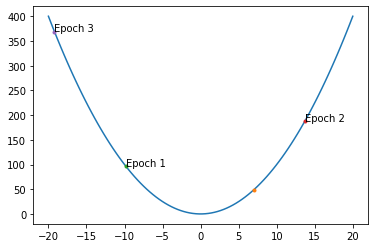

In [ ]:
xt = torch.linspace(-20,20,100)
yt = xt**2
plt.plot(xt,yt)

xi = 7
yi = xi**2

def train_test(n_epochs, learning_rate, xi, yi):
  plt.plot(xi,yi,'.')

  ax = plt.gca()

  

  for i in range(n_epochs):

    xi = xi - learning_rate*(2*xi)
    yi = xi**2
    plt.plot(xi,yi,'.')
  
    plt.text(xi, yi, f'Epoch {i+1}')


n_epochs = 3
learning_rate = 1.2

train_test(n_epochs, learning_rate, xi, yi)

When the learning ratio is reduced this problem is solved.

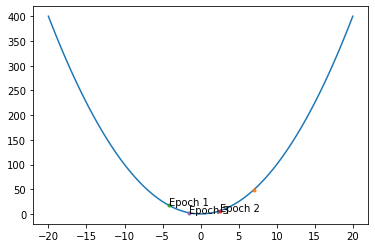

In [ ]:
plt.plot(xt,yt)

n_epochs = 3
learning_rate = 0.8

train_test(n_epochs, learning_rate, xi, yi)

Now, ff the number of iterations is also increased


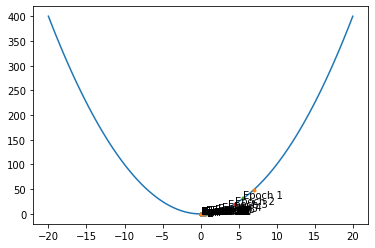

In [ ]:
plt.plot(xt,yt)

n_epochs = 30
learning_rate = 0.1

train_test(n_epochs, learning_rate, xi, yi)

The same approach can be applied to learning with the linear model.

In [ ]:
(wp, bp, loss) = training_loop(n_epochs = 10000, 
              learning_rate = 1e-4,
              wp = 1,
              bp = 1,
              x = x,
              y = y)

Epoch 1, Loss 3491.89306640625, wp_grad: -6763.255859375, bp_grad: -102.76838684082031
Epoch 2, Loss 419.2891540527344, wp_grad: -2320.80859375, bp_grad: -35.79161071777344
Epoch 3, Loss 57.482444763183594, wp_grad: -796.37939453125, bp_grad: -12.808448791503906
Epoch 4, Loss 14.878763198852539, wp_grad: -273.2704162597656, bp_grad: -4.921734809875488
Epoch 5, Loss 9.862009048461914, wp_grad: -93.76502227783203, bp_grad: -2.215372085571289
Epoch 10, Loss 9.192130088806152, wp_grad: -0.43365478515625, bp_grad: -0.8080571889877319
Epoch 100, Loss 9.186361312866211, wp_grad: 0.01206207275390625, bp_grad: -0.7976835370063782
Epoch 500, Loss 9.16141414642334, wp_grad: 0.010945320129394531, bp_grad: -0.781667947769165
Epoch 1000, Loss 9.131614685058594, wp_grad: 0.01105499267578125, bp_grad: -0.7620790004730225
Epoch 5000, Loss 8.940637588500977, wp_grad: 0.009258270263671875, bp_grad: -0.6220826506614685
Epoch 10000, Loss 8.788850784301758, wp_grad: 0.008399009704589844, bp_grad: -0.4826639

It can be seen how the system converges and the loss function is reduced.

The graphical representation shows how most of the learning occurs in the first iterations.

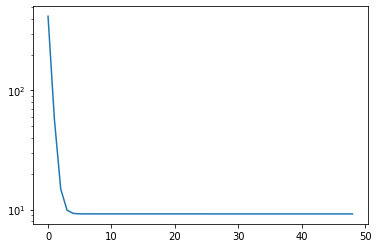

In [ ]:
plt.semilogy(loss[1:50])

The representation of the model with the data shows how it fits.

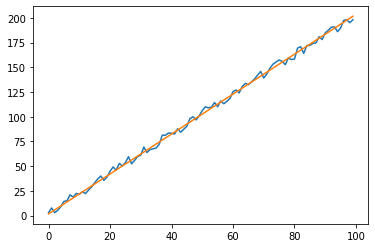

In [ ]:
plt.plot(x,y)

yp = model(x, wp, bp)
plt.plot(x, yp)

## Data normalization

To improve the result it is usual to normalize the data. In this way one parameter will not have more weight than another. Below is an example where the x-axis is normalized by multiplying it by 0.1.

In [ ]:
(wp, bp, loss) = training_loop(n_epochs = 1000, 
              learning_rate = 1e-2,
              wp = 1,
              bp = 1,
              x = x*0.1,
              y = y)

Epoch 1, Loss 12238.45703125, wp_grad: -1267.3555908203125, bp_grad: -191.86839294433594
Epoch 2, Loss 1326.7628173828125, wp_grad: -416.088134765625, bp_grad: -62.56282043457031
Epoch 3, Loss 150.96116638183594, wp_grad: -136.6494140625, bp_grad: -20.11884117126465
Epoch 4, Loss 24.25811195373535, wp_grad: -44.9200439453125, bp_grad: -6.188183307647705
Epoch 5, Loss 10.60157585144043, wp_grad: -14.808431625366211, bp_grad: -1.6173384189605713
Epoch 10, Loss 8.933691024780273, wp_grad: -0.14766216278076172, bp_grad: 0.5941300392150879
Epoch 100, Loss 8.712175369262695, wp_grad: -0.05856895446777344, bp_grad: 0.38515758514404297
Epoch 500, Loss 8.56208610534668, wp_grad: -0.00793468952178955, bp_grad: 0.05267852544784546
Epoch 1000, Loss 8.559248924255371, wp_grad: -0.0006420016288757324, bp_grad: 0.004382655024528503


Linear fit can be performed analytically, no search required. Therefore, the previous model can be compared with the standard linear regression.

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy
linr = LinearRegression()
xnp = x.numpy().reshape((-1, 1))
ynp = y.numpy()
linr.fit(xnp, ynp)
print(linr.intercept_, linr.coef_[0])

yp = model(x, linr.coef_[0], linr.intercept_)
     
# How wrong is our model? That's the error! 
loss = loss_fn(yp, y)

print(loss)

2.5954728104808567 2.005832774851582
tensor(8.5592)


# Automatic gradient calculation with PyTorch

The training process for a more complex model is more difficult to analyze. The calculation of gradient can become very difficult when the output is obtained as the composition of many functions. PyTorch facilitates the training process by calculating the gradient automatically.

Look at the following example.

In [ ]:
xt = torch.tensor(1.0, requires_grad=True)
yt = xt**2

yt.backward()
xt.grad

tensor(2.)

An operation is performed and the gradient is propagated backwards $\frac{dy}{dx}$.

This same idea can be used to calculate the gradient of the model with respect to the parameters.

In [ ]:
def training_loop_grad(n_epochs, learning_rate, wp, bp, x, y):

  # This indicates these tensors require the calculation of the gradient
  wp = torch.tensor(wp, requires_grad=True, dtype=torch.float)
  bp = torch.tensor(bp, requires_grad=True, dtype=torch.float)

  for epoch in range(n_epochs):
      # Computes our model's predicted output
      yp = model(x, wp, bp)
      
      # Calculate loss
      loss = loss_fn(yp, y)

      # Propagate the gradient calculation
      loss.backward()

      # wp.grad is the gradient of loss with respect to wp, same for bp.grad

      # no_grad tells pytorch not to use this calculation to update the gradient
      with torch.no_grad():
        wp -= learning_rate * wp.grad
        bp -= learning_rate * bp.grad

      if epoch+1 in (1, 2, 3, 4, 5, 10, 100, 500, 1000, 5000, 10000):
        print(f'Epoch {epoch+1}, Loss {loss}, wp_grad: {wp.grad}, bp_grad: {bp.grad}')

      wp.grad.zero_()
      bp.grad.zero_()
    
  return (wp, bp)


(wp, bp) = training_loop_grad(n_epochs = 10000, 
              learning_rate = 1e-4,
              wp = 1.0,
              bp = 1.0,
              x = x,
              y = y)

Epoch 1, Loss 3491.89306640625, wp_grad: -6763.25537109375, bp_grad: -102.76837921142578
Epoch 2, Loss 419.2891540527344, wp_grad: -2320.808349609375, bp_grad: -35.791603088378906
Epoch 3, Loss 57.482444763183594, wp_grad: -796.3792724609375, bp_grad: -12.808448791503906
Epoch 4, Loss 14.878763198852539, wp_grad: -273.2704162597656, bp_grad: -4.921734809875488
Epoch 5, Loss 9.862009048461914, wp_grad: -93.76502227783203, bp_grad: -2.215372085571289
Epoch 10, Loss 9.192130088806152, wp_grad: -0.43365478515625, bp_grad: -0.8080571889877319
Epoch 100, Loss 9.186361312866211, wp_grad: 0.012063980102539062, bp_grad: -0.7976834774017334
Epoch 500, Loss 9.16141414642334, wp_grad: 0.010945320129394531, bp_grad: -0.7816678881645203
Epoch 1000, Loss 9.131614685058594, wp_grad: 0.011056900024414062, bp_grad: -0.7620788812637329
Epoch 5000, Loss 8.940637588500977, wp_grad: 0.009259223937988281, bp_grad: -0.6220825910568237
Epoch 10000, Loss 8.788850784301758, wp_grad: 0.008400917053222656, bp_grad

PyTorch knows how to calculate derivatives because it memorizes all the operations.

In [ ]:
!pip install torchviz

  Created wheel for torchviz: filename=torchviz-0.0.2-cp37-none-any.whl size=4152 sha256=3bc17749387241b9e8e225cebe841903aee47e7565f1de17ae2875b1c4eeb767
  Stored in directory: /root/.cache/pip/wheels/01/26/58/026ffd533dbe8b3972eb423da9c7949beca68d1c98ed9e8624
Successfully built torchviz


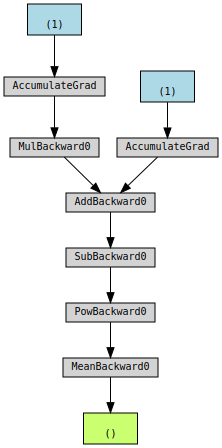

In [ ]:
import torchviz

w = torch.randn(1, requires_grad=True, dtype=torch.float)
b = torch.randn(1, requires_grad=True, dtype=torch.float)

yp = x * w + b
error = yp - y
loss = (error ** 2).mean()

torchviz.make_dot(loss)

# Using an optimizer

Optimizers are also available in PyTorch, so you don't have to do the process manually. In this case we use [Stochastic gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) (SGD)

In [ ]:
def training_loop_optim(n_epochs, optimizer, wp, bp, x, y):

  for epoch in range(n_epochs):
      # Computes our model's predicted output
      yp = model(x, wp, bp)
      
      # How wrong is our model? That's the error! 
      loss = loss_fn(yp, y)
      loss.backward()

      optimizer.step()

      if epoch+1 in (1, 2, 3, 4, 5, 10, 100, 500, 1000, 5000, 10000):
        print(f'Epoch {epoch+1}, Loss {loss}, wp_grad: {wp.grad}, bp_grad: {bp.grad}')

      optimizer.zero_grad()
    
  return (wp, bp)

learning_rate = 1e-4

wp = torch.tensor(1, requires_grad=True, dtype=torch.float)
bp = torch.tensor(1, requires_grad=True, dtype=torch.float)

optimizer = torch.optim.SGD([wp, bp], lr=learning_rate)

(wp, bp) = training_loop_optim(n_epochs = 1000, 
              optimizer = optimizer,
              wp = wp,
              bp = bp,
              x = x,
              y = y)

Epoch 1, Loss 3491.89306640625, wp_grad: -6763.25537109375, bp_grad: -102.76837921142578
Epoch 2, Loss 419.2891540527344, wp_grad: -2320.808349609375, bp_grad: -35.791603088378906
Epoch 3, Loss 57.482444763183594, wp_grad: -796.3792724609375, bp_grad: -12.808448791503906
Epoch 4, Loss 14.878763198852539, wp_grad: -273.2704162597656, bp_grad: -4.921734809875488
Epoch 5, Loss 9.862009048461914, wp_grad: -93.76502227783203, bp_grad: -2.215372085571289
Epoch 10, Loss 9.192130088806152, wp_grad: -0.43365478515625, bp_grad: -0.8080571889877319
Epoch 100, Loss 9.186361312866211, wp_grad: 0.012063980102539062, bp_grad: -0.7976834774017334
Epoch 500, Loss 9.16141414642334, wp_grad: 0.010945320129394531, bp_grad: -0.7816678881645203
Epoch 1000, Loss 9.131614685058594, wp_grad: 0.011056900024414062, bp_grad: -0.7620788812637329


Other options include the Adam optimizer.

In [ ]:
learning_rate = 1e-1

wp = torch.tensor(1, requires_grad=True, dtype=torch.float)
bp = torch.tensor(1, requires_grad=True, dtype=torch.float)

optimizer = torch.optim.Adam([wp, bp], lr=learning_rate)

(wp, bp) = training_loop_optim(n_epochs = 1000, 
              optimizer = optimizer,
              wp = wp,
              bp = bp,
              x = x,
              y = y)

Epoch 1, Loss 3491.89306640625, wp_grad: -6763.25537109375, bp_grad: -102.76837921142578
Epoch 2, Loss 2839.1259765625, wp_grad: -6096.6552734375, bp_grad: -92.66838836669922
Epoch 3, Loss 2256.255859375, wp_grad: -5432.74755859375, bp_grad: -82.60918426513672
Epoch 4, Loss 1744.1195068359375, wp_grad: -4773.8076171875, bp_grad: -72.625244140625
Epoch 5, Loss 1302.919921875, wp_grad: -4122.5400390625, bp_grad: -62.757545471191406
Epoch 10, Loss 102.81088256835938, wp_grad: -1111.7730712890625, bp_grad: -17.139726638793945
Epoch 100, Loss 8.628947257995605, wp_grad: -8.459798812866211, bp_grad: -0.3829543888568878
Epoch 500, Loss 8.561346054077148, wp_grad: 0.04411125183105469, bp_grad: -0.04572838544845581
Epoch 1000, Loss 8.55922794342041, wp_grad: 0.0007381439208984375, bp_grad: -0.0008340030908584595


As you can see, now the training method is decoupled from the optimizer.

The final result can be analyzed.

Text(0.5, 1.0, 'Model: y = x*2.0058577060699463 + 2.593824625015259')

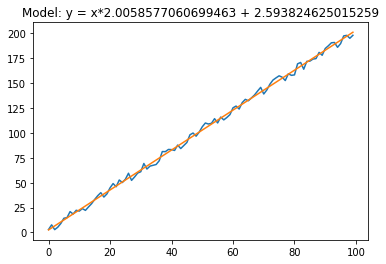

In [ ]:
plt.plot(x,y)

yp = model(x, wp, bp)
plt.plot(x, yp.detach().numpy())
plt.title(f'Model: y = x*{wp} + {bp}')

# Create a model with classes

In Pytorch models can be created more easily by inheriting the Module class. In this case, it is only necessary to redefine the forward method that the model applies to the data. It is also possible to use a loss function already available in the library.

In [ ]:
class LinearModel(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.w = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        return self.w * x + self.b

linearModel = LinearModel()

device = torch.device("cpu")
linearModel.to(device)

criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(linearModel.parameters(), lr=1e-1)

for epoch in range(10000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = linearModel(x)

    loss = criterion(y_pred, y)

    if epoch+1 in (1, 2, 3, 4, 5, 10, 100, 500, 1000, 5000, 10000):
      print(f'Epoch {epoch+1}, Loss {loss}')

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Model: y = {linearModel.b} + {linearModel.w} x')

Epoch 1, Loss 332.0518493652344
Epoch 2, Loss 157.12794494628906
Epoch 3, Loss 51.96406555175781
Epoch 4, Loss 11.540021896362305
Epoch 5, Loss 20.641157150268555
Epoch 10, Loss 62.1997184753418
Epoch 100, Loss 9.000170707702637
Epoch 500, Loss 8.559228897094727
Epoch 1000, Loss 8.559226989746094
Epoch 5000, Loss 8.559226036071777
Epoch 10000, Loss 8.559231758117676
Model: y = 2.595482110977173 + 2.0058412551879883 x


# Using a prebuilt model

In most cases there are already predesigned models that can be used to fit the data of a certain problem. In that case it can be used directly. This is precisely the case with a linear fit.

In [ ]:
linearModel = torch.nn.Linear(1, 1)

# Loss and optimizer
criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(linearModel.parameters(), lr=1e-1)

xval = torch.unsqueeze(x,1).float()
yval = torch.unsqueeze(y,1).float()

# Train the model
for epoch in range(10000):

    # Forward pass
    yp = linearModel(xval)
    loss = criterion(yp, yval)

    if epoch+1 in (1, 2, 3, 4, 5, 10, 100, 500, 1000, 5000, 10000):
      print(f'Epoch {epoch+1}, Loss {loss}')
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Model: y = {linearModel.bias.item()} + {linearModel.weight.item()} x')

Epoch 1, Loss 19647.1796875
Epoch 2, Loss 18050.712890625
Epoch 3, Loss 16523.900390625
Epoch 4, Loss 15067.86328125
Epoch 5, Loss 13683.53515625
Epoch 10, Loss 7855.986328125
Epoch 100, Loss 8.70557689666748
Epoch 500, Loss 8.573247909545898
Epoch 1000, Loss 8.560593605041504
Epoch 5000, Loss 8.559226989746094
Epoch 10000, Loss 8.559225082397461
Model: y = 2.5954713821411133 + 2.005831718444824 x


# Exercise: polynomial fit



<img  align="left" style="padding-right:10px;" src="https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/pencil.jpg" width=50> Performs a fit of the following data to a polynomial of degree 4: $y=ax^4+bx^3+cx^2+dx+e$

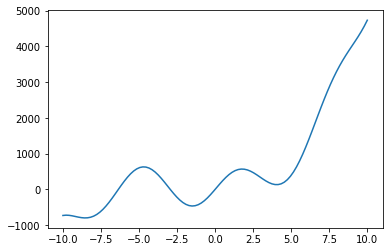

In [ ]:
xt = torch.linspace(-10, 10, 100)
yt = 3*xt**3 + 20*xt**2 + 500*xt.sin()
plt.plot(xt,yt)

Epoch 1, Loss 10728244.0
Epoch 2, Loss 10501343.0
Epoch 3, Loss 10277005.0
Epoch 4, Loss 10055277.0
Epoch 5, Loss 9836198.0
Epoch 10, Loss 8781891.0
Epoch 100, Loss 634030.8125
Epoch 500, Loss 173177.15625
Epoch 1000, Loss 168959.4375
Epoch 5000, Loss 118530.4296875
Epoch 10000, Loss 113606.8203125


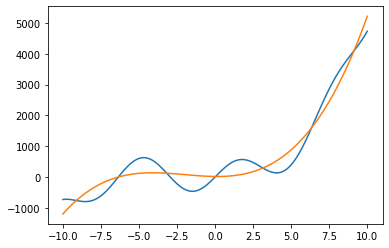

In [ ]:
#@title Click here to see the answer

class PolModel3(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.a = torch.nn.Parameter(torch.randn(()))
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))
        self.e = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        return self.a * x**4 + self.b * x**3 + self.c* x**2 + self.d* x + self.e

polModel = PolModel3()

criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(polModel.parameters(), lr=1e-2)

xt = torch.linspace(-10, 10, 100)
yt = 3*xt**3 + 20*xt**2 + 500*xt.sin()

for epoch in range(10000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = polModel(xt)

    loss = criterion(y_pred, yt)

    if epoch+1 in (1, 2, 3, 4, 5, 10, 100, 500, 1000, 5000, 10000):
      print(f'Epoch {epoch+1}, Loss {loss}')

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

plt.plot(xt, yt)
plt.plot(xt, polModel(xt).detach())



## Example for polynomial of variable degree

To fit a polynomial of variable degree you can perform a transformation:

$y = ax^2+bx+c$

$y = az_0+bz_1+c$

where $z_0=x^2$ y $z_1=x$

The same process can be followed for a higher degree.

Following this approach, a transformation is performed to a linear fit that can be solved with the class `torch.nn.Linear`.

Epoch 1, Loss 16089.6025390625
Epoch 2, Loss 13319.9228515625
Epoch 3, Loss 10821.673828125
Epoch 4, Loss 8598.3173828125
Epoch 5, Loss 6651.201171875
Epoch 10, Loss 893.48876953125
Epoch 100, Loss 56.58309555053711
Epoch 500, Loss 4.430404186248779
Epoch 1000, Loss 1.5624053478240967
Epoch 5000, Loss 0.08451444655656815
Epoch 10000, Loss 0.0317758210003376
Epoch 20000, Loss 0.019111014902591705


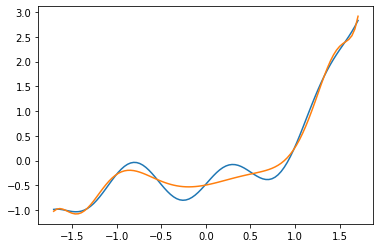

In [ ]:
#@title Click here to see the answer

class PolModelN(torch.nn.Module):
    def __init__(self, n):
        super().__init__()
        self.fc1 = torch.nn.Linear(n, 1)

    def forward(self, x):
        return self.fc1(x)

xt = torch.linspace(-10, 10, 100)
yt = 3*xt**3 + 20*xt**2 + 500*xt.sin()

# Data normalization
xt = (xt - xt.mean()) / xt.std()
yt = (yt - yt.mean()) / yt.std()

n = 15
polModel = PolModelN(n)

zt = torch.zeros(len(xt),n);
for i in range(n):
  zt[:,i] = xt**(i+1)
  
criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(polModel.parameters(), lr=1e-2)

yval = torch.unsqueeze(yt,1).float()

for epoch in range(20000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = polModel(zt)

    loss = criterion(y_pred, yval)

    if epoch+1 in (1, 2, 3, 4, 5, 10, 100, 500, 1000, 5000, 10000, 20000):
      print(f'Epoch {epoch+1}, Loss {loss}')

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

plt.plot(xt, yt)
plt.plot(xt, polModel(zt).detach())